**Plataformas de visualización - DS_C3_SC2_T2**

---


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pd.options.display.max_rows = 10

1.	Leer en dos dataframes `birth` y `death`, el contenido de los archivos Birth.csv y Death.csv respectivamente, que almacenan, por país, las tasas brutas de natalidad y mortalidad desde 1960. 

In [11]:
birth = pd.read_csv('Birth.csv')
birth

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,35.679,34.529,33.320,32.050,30.737,29.413,28.121,26.908,...,11.361,11.214,11.123,11.090,11.111,11.179,11.281,11.404,11.532,11.652
1,Afghanistan,AFG,51.279,51.373,51.457,51.530,51.589,51.631,51.652,51.650,...,40.903,39.829,38.750,37.690,36.670,35.706,34.809,33.981,33.211,32.487
2,Angola,AGO,49.080,48.779,48.547,48.430,48.450,48.622,48.936,49.343,...,46.143,45.656,45.102,44.493,43.847,43.182,42.520,41.882,41.281,40.729
3,Albania,ALB,40.924,40.368,39.627,38.723,37.695,36.599,35.496,34.435,...,11.945,12.001,12.100,12.197,12.257,12.259,12.197,12.080,11.934,11.780
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.900,9.800,NaN,9.500,NaN,NaN,NaN,8.800,NaN,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.800,18.500,18.300,18.000,17.700,17.400,17.100,16.800,16.400,16.000
260,"Yemen, Rep.",YEM,53.504,53.786,54.089,54.413,54.750,55.089,55.413,55.705,...,34.834,34.472,34.091,33.680,33.229,32.735,32.197,31.627,31.040,30.453
261,South Africa,ZAF,41.075,40.882,40.663,40.419,40.152,39.871,39.588,39.313,...,23.417,23.305,23.097,22.815,22.483,22.113,21.719,21.314,20.908,20.510
262,Zambia,ZMB,49.672,49.806,49.872,49.865,49.793,49.680,49.559,49.459,...,41.738,41.194,40.620,40.002,39.339,38.645,37.950,37.292,36.699,36.192


In [12]:
death = pd.read_csv('Death.csv')

2.	A partir de los dataframes anteriores obtén otros dos (`mexico_births`, `mexico_deaths`) donde sólo almacenes la información de México. Haz los cambios necesarios para que queden con la siguiente estructura.

In [13]:
mexico_births = birth[birth['Country Name']=='Mexico']
mexico_births = mexico_births.drop('Country Code',axis=1)
mexico_births.set_index('Country Name',inplace=True)
mexico_births = mexico_births.T
mexico_births.index.name = 'Year'
mexico_births.columns.name = ''
mexico_births.columns = ['Births']

In [14]:
mexico_births

,Births
Year,
1960,45.179
1961,44.919
1962,44.698
1963,44.517
1964,44.366
...,...
2014,18.892
2015,18.573
2016,18.245


In [15]:
mexico_deaths = death[death['Country Name']=='Mexico']
mexico_deaths = mexico_deaths.drop('Country Code',axis=1)
mexico_deaths.set_index('Country Name',inplace=True)
mexico_deaths = mexico_deaths.T
mexico_deaths.index.name = 'Year'
mexico_deaths.columns.name = ''
mexico_deaths.columns = ['Deaths']

In [16]:
mexico_deaths


,Deaths
Year,
1960,12.270
1961,11.915
1962,11.610
1963,11.346
1964,11.114
...,...
2014,5.670
2015,5.763
2016,5.851


3.	Junta los dataframes para que quede toda la información sólo en uno (`mexico`)

In [17]:
mexico = mexico_births.join(mexico_deaths)
mexico

,Births,Deaths
Year,,
1960,45.179,12.270
1961,44.919,11.915
1962,44.698,11.610
1963,44.517,11.346
1964,44.366,11.114
...,...,...
2014,18.892,5.670
2015,18.573,5.763
2016,18.245,5.851


4.	Grafica el dataframe anterior utilizando la plataforma Seaborn. Ajusta las marcas de los ejes para que se muestren en períodos de 5. Personaliza las propiedades del gráfico para que se vea como sigue:

Text(0.5, 0, '')

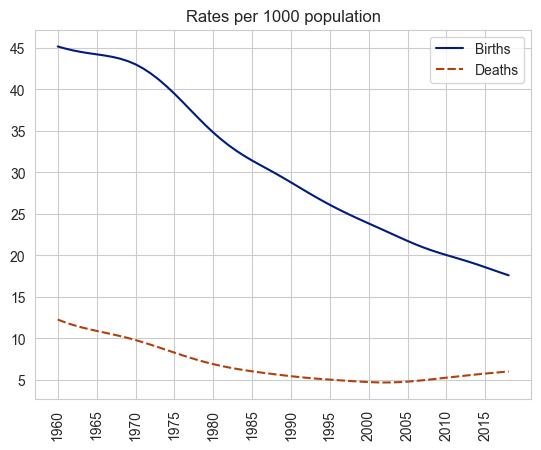

In [18]:
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.lineplot(data=mexico)
plt.title('Rates per 1000 population')
plt.xticks(np.arange(0, len(mexico)+1, 5))
plt.xticks(rotation=90)
plt.xlabel('')

5.	Ordena el dataframe inicial `death` para determinar los tres países con la tasa de mortalidad más alta en el 2018. Obtén una muestra (`sample`), donde incluyas dichos países, México y otro país de tu selección. Visualiza las tasas en un gráfico de barras horizontales usando Pandas, como se muestra en la figura.

<Axes: title={'center': 'Death rate 2018'}, ylabel='Country Name'>

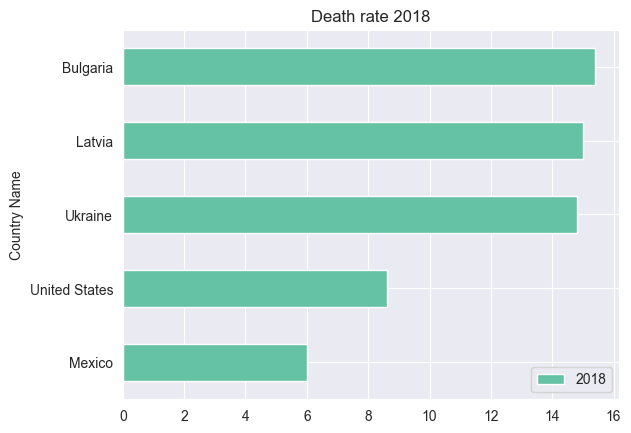

In [19]:
sns.set_palette('Set2')
sns.set_style('darkgrid')
death.sort_values('2018',inplace=True)
death.dropna(axis=0,subset=['2018'],inplace=True)
sample = pd.concat([death[death['Country Name']=='Mexico'],death[death['Country Name']=='United States'],death[-3:]])
sample.plot(kind='barh',x='Country Name',y='2018',title='Death rate 2018')

6.	Utiliza la dataframe inicial `birth` para realizar un análisis de la tasa de natalidad en el 2018. Se busca determinar cuántos países están por debajo del promedio de nacimientos y cuántos por encima. No olvides borrar los registros que no tienen información registrada (`NaN`) antes de hacer los conteos. Visualiza los resultados en un gráfico circular usando Matplotlib, como se muestra en la figura.

Text(0.5, 1.0, 'Number of countries')

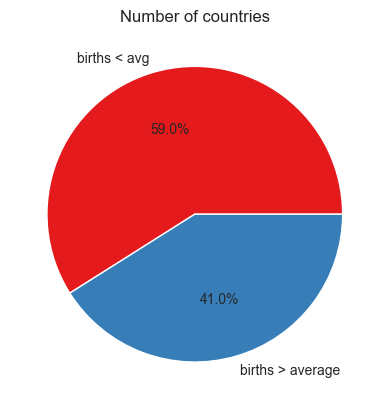

In [20]:
sns.set_palette("Set1")
birth.dropna(axis=0,subset=['2018'],inplace=True)
below_avg = len(birth[birth['2018'] < birth['2018'].mean()])
count = [below_avg, len(birth['2018']) - below_avg]
plt.pie(count,labels=['births < avg','births > average'],autopct='%1.1f%%')
plt.title('Number of countries')